# Simple Gaussian Mixture Model on Toy Data

## Goal

This demo walks you through a "Hello World" example of using **bnpy** from within Python.

We'll train a Gaussian mixture model using expectation maximization (EM). It should only take 30 seconds to produce a nice visualization.

## Installation

Follow [these instructions](../Installation.md) to make sure you've got **bnpy** and its dependencies installed correctly. 

Throughout this demo (and other demos), we'll assume you successfully installed **bnpy** in a directory which is on your **\$PYTHONPATH**.

We can use the following import statements to load bnpy and matplotlib plotting utilities.

In [1]:
import bnpy

In [2]:
%pylab inline
from bnpy.viz.PlotUtil import ExportInfo
bnpy.viz.PlotUtil.ConfigPylabDefaults(pylab)

Populating the interactive namespace from numpy and matplotlib


## Toy dataset : `AsteriskK8`

We'll use a simple dataset of 2D points, drawn from 8 well-separated Gaussian clusters.

In [3]:
import AsteriskK8
Data = AsteriskK8.get_data()

We can visualize this dataset as follows:

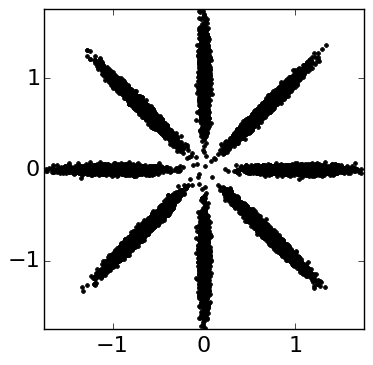

In [4]:
pylab.plot(Data.X[:,0], Data.X[:,1], 'k.');
pylab.axis('image'); 
pylab.xlim([-1.75, 1.75]); pylab.xticks([-1, 0, 1]);
pylab.ylim([-1.75, 1.75]); pylab.yticks([-1, 0, 1]);

# Ignore this block. Only needed for auto-generation of documentation.
if ExportInfo['doExport']:
    W_in, H_in = pylab.gcf().get_size_inches()
    figpath100 = '../docs/source/_static/GaussianToyData_%dx%d.png' % (100, 100)
    pylab.savefig(figpath100, bbox_inches=0, pad_inches=0, dpi=ExportInfo['dpi']/W_in);

## Running inference with **bnpy**

We'll fit a $K=8$ Gaussian mixture model to a simple toy dataset.  Here's the code along with its output to **stdout**.


In [5]:
hmodel, RInfo = bnpy.run('AsteriskK8', 'FiniteMixtureModel', 'Gauss', 'EM', nLap=50, K=8, convergeThr=0.001)

Asterisk Toy Data. 8 true clusters.


  size: 25000 units (single observations)
  dimension: 2


Allocation Model:  Finite mixture with K=8. Dir prior param 1.00
Obs. Data  Model:  Gaussian with full covariance.
Obs. Data  Prior:  Gauss-Wishart on each mean/prec matrix pair: mu, Lam
  E[ mu[k] ]     = [ 0.  0.]
  E[ CovMat[k] ] = 
  [[ 1.  0.]
   [ 0.  1.]]


Learn Alg: EM


Trial  1/1 | alg. seed: 4226944 | data order seed: 8541952


savepath: /results/AsteriskK8/defaultjob/1


        1/50 after      0 sec. | K    8 | ev -5.233448743e+06 |  


        2/50 after      0 sec. | K    8 | ev -7.255537859e-01 | Ndiff  469.916 


        3/50 after      1 sec. | K    8 | ev -4.881217375e-01 | Ndiff  838.469 


        4/50 after      1 sec. | K    8 | ev -3.600440237e-01 | Ndiff  624.909 


        5/50 after      1 sec. | K    8 | ev -1.504401133e-01 | Ndiff  382.469 


        6/50 after      1 sec. | K    8 | ev -1.208708327e-02 | Ndiff  621.636 


        7/50 after      1 sec. | K    8 | ev  1.924327448e-02 | Ndiff  434.059 


        8/50 after      1 sec. | K    8 | ev  4.236480859e-02 | Ndiff  239.341 


        9/50 after      1 sec. | K    8 | ev  7.086226579e-02 | Ndiff  108.915 


       10/50 after      2 sec. | K    8 | ev  1.053270414e-01 | Ndiff   16.711 


       11/50 after      2 sec. | K    8 | ev  1.084152629e-01 | Ndiff    0.708 


       12/50 after      2 sec. | K    8 | ev  1.084158112e-01 | Ndiff    0.019 


       13/50 after      2 sec. | K    8 | ev  1.084158115e-01 | Ndiff    0.000 


... done. converged.


That's it.  **bnpy.run** is the function that runs experiments. It handles loading data, constructing models and applying learning algorithms.

## Frequently Asked Questions

### Where are results saved?

Model parameters will also be saved to a subdirectory of $BNPYOUTDIR.

### How do I plot the objective function over time?

Here, we plot the log evidence (sometimes called the evidence lower bound or ELBO).

(-3.8, 1.2)

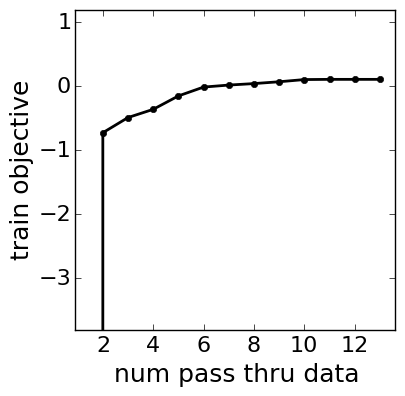

In [6]:
bnpy.viz.PlotELBO.plotJobsThatMatchKeywords('AsteriskK8/defaultjob', taskids=1);
pylab.ylim([-3.8, 1.2])

### How do I plot the learned model parameters?

We can examine the resulting model parameters (means and covariances) using **bnpy**'s built-in [visualization tools](../Code/Viz/Visualization.md).

Specifically, we can use the `plotCompsForTask` method to visualize the final result of this run.  

This creates a 2D plot of the 8 learned components (colored elliptical contours).

Each component's Gaussian pdf is shown as a contour plot, where lines represent contours of equal probability density. The contours of a Gaussian always form an ellipse. 


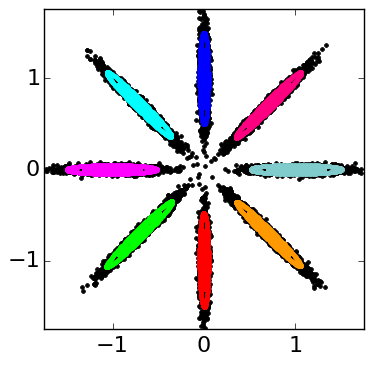

In [7]:
bnpy.viz.PlotComps.plotCompsForTask('AsteriskK8/defaultjob/1/', Data=Data);
pylab.axis('image'); 
pylab.xlim([-1.75, 1.75]); pylab.xticks([-1, 0, 1]);
pylab.ylim([-1.75, 1.75]); pylab.yticks([-1, 0, 1]);

# Ignore this block. Only needed for auto-generation of documentation.
if ExportInfo['doExport']:
    W_in, H_in = pylab.gcf().get_size_inches()
    figpath100 = '../docs/source/_static/GaussianToyData_FiniteMixtureModel_EM_SingleRunDemo_%dx%d.png' % (100, 100)
    pylab.savefig(figpath100, bbox_inches=0, pad_inches=0, dpi=ExportInfo['dpi']/W_in);

### Will the solution always be perfect?

No learning algorithm in **bnpy** is guaranteed to find the best solution.  Instead, EM and variational inference are vulnerable to *local optima*. We think this is important to highlight from the first demo, to raise awareness of this issue.